In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78722686/why-do-i-get-negative-values-for-parameters-in-a-curve-fitting

In [2]:
np.random.seed(12345)

[0.86327962 3.39044504]
[0.59288112 4.42584428]
[0.7211142  3.94562003]
[0.27521403 4.81387763]
[0.5524922 4.1973605]
[0.81949297 3.61180514]
[0.47732828 4.25294544]
[0.68462189 4.21007911]
[0.24177315 5.00737633]
[0.45515128 4.45239154]
mean aX value = 0.5683348738642702 +/- 0.06678702500425662 , gen = 0.74
mean bX value = 4.230774503337267 +/- 0.156450634060659 , gen = 0.11


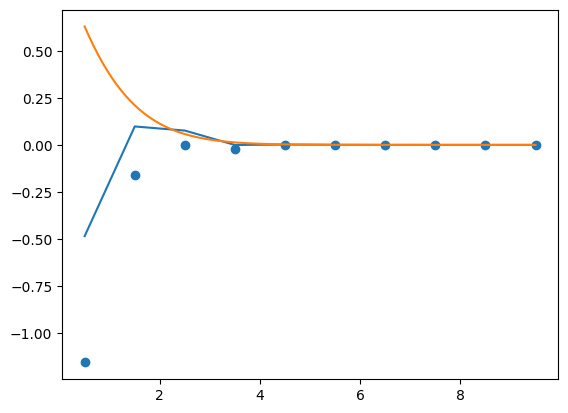

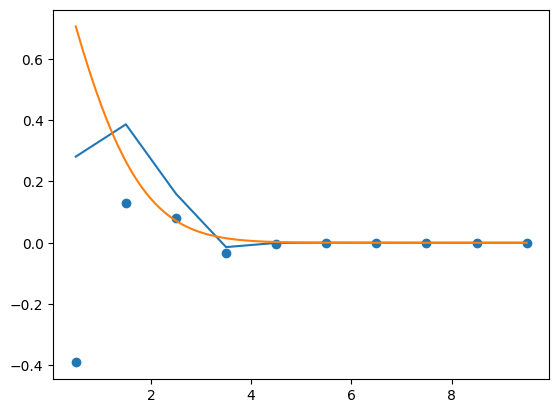

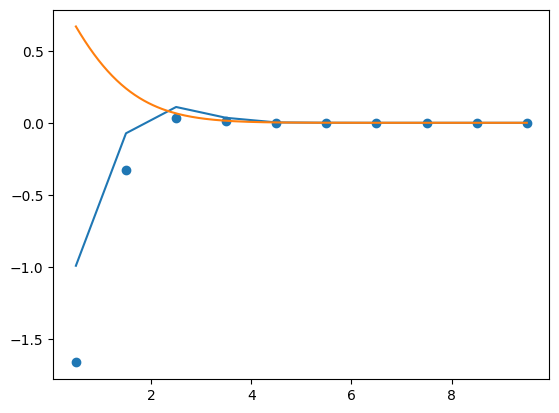

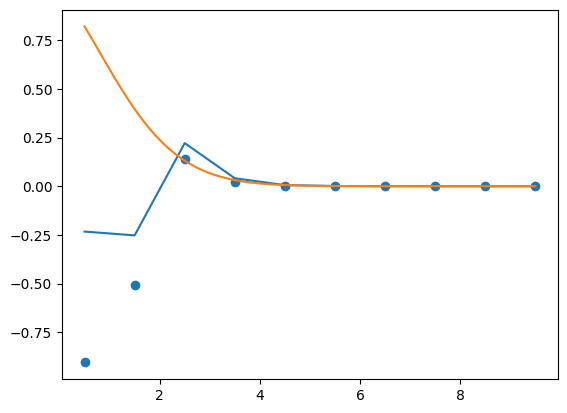

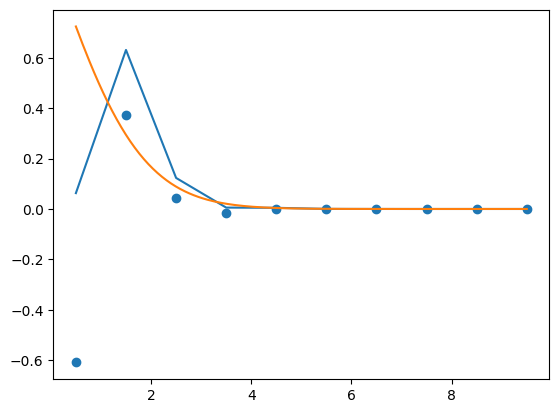

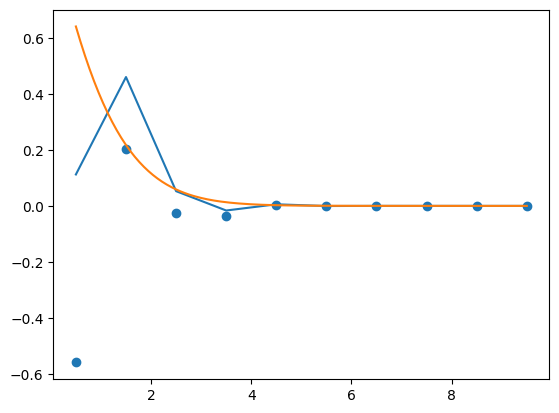

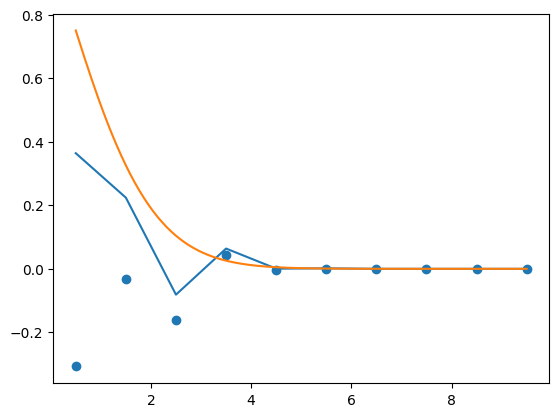

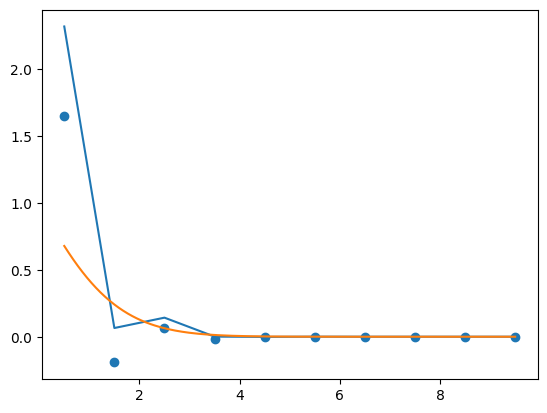

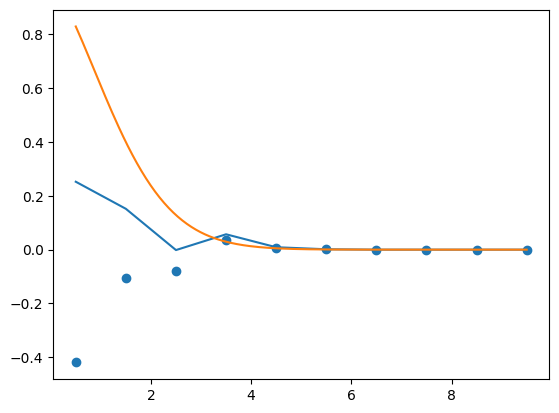

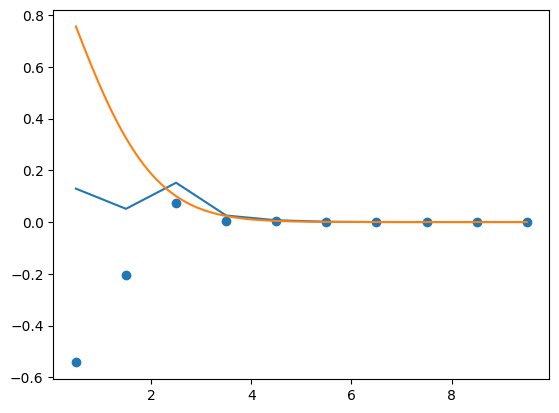

In [16]:
# Define linear quadratic curve
def linq(x, aparam, bparam):
    return np.exp(-(aparam*x+ bparam*x**2))

#new model
NX=46
def abX(x, aXparam, bXparam):
    return np.exp(- (aXparam + bXparam) * x) * (1 + bXparam * x / NX) ** NX

# define result array
avalues =[]
davalues =[]
bvalues=[]
dbvalues =[]
Chi2=[]

# Model parameters
Dmax = 10.
a1=0.740
b1=.1100

# ensemble size
Nensemble = 10

for iexp in range(1, Nensemble+1):
    
    # Create the artificial dataset
    nobs = int(Dmax + .5)
    x = np.arange(.5, nobs)
    N = linq(x, a1, b1)
    s = np.ones_like(N) * 1.1 * N
    Nfluct = s * np.random.normal(size=nobs)
    N = N + Nfluct
    
    # Fit the curve
    start = (0., 5.)
    popt, pcov = optimize.curve_fit(abX, x, N, p0=start, sigma=s, absolute_sigma=True)
    print(popt)
    
    xlin = np.linspace(x.min(), x.max(), 200)
    fig, axe = plt.subplots()
    axe.scatter(x, Nfluct)
    axe.plot(x, N)
    axe.plot(xlin, abX(xlin, *popt))
    
    # add result to result vectors
    avalues=avalues+[popt[0]]
    bvalues=bvalues+[popt[1]]
    davalues=davalues+[np.sqrt(pcov[0,0])]
    dbvalues=dbvalues+[np.sqrt(pcov[1,1])]

print("mean aX value =",np.mean(avalues),"+/-",np.std(avalues)/np.sqrt(Nensemble-1),", gen =",a1) 
print("mean bX value =",np.mean(bvalues),"+/-",np.std(bvalues)/np.sqrt(Nensemble-1),", gen =",b1)


In [4]:
a1 = 0.740
b1 = 0.1100

In [5]:
def model1(x, a, b):
    return np.exp(-(a * x + b * x **2))

In [6]:
def model2(x, a, b, N=46):
    return np.exp(- (a + b) * x) * (1 + b * x / N) ** N

In [7]:
xlin = np.linspace(0.5, 9.5, 200)
ylin = model1(xlin, a1, b1)

In [8]:
popt, pcov = optimize.curve_fit(model2, xlin, ylin, p0=[0., 5.])
popt, pcov

(array([0.72716386, 3.44478853]),
 array([[ 2.99618275e-07, -2.70844576e-06],
        [-2.70844576e-06,  2.85220271e-05]]))

In [18]:
popt, pcov = optimize.curve_fit(model2, xlin, ylin, p0=[0., 1.], bounds=(0., np.inf))
popt, pcov

(array([0.72716384, 3.44478875]),
 array([[ 2.99617959e-07, -2.70844633e-06],
        [-2.70844633e-06,  2.85220715e-05]]))

In [9]:
yhat = model2(xlin, *popt)

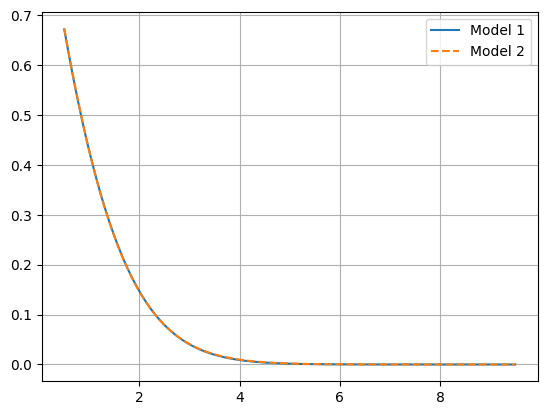

In [10]:
fig, axe = plt.subplots()
axe.plot(xlin, ylin, label="Model 1")
axe.plot(xlin, yhat, "--", label="Model 2")
axe.legend()
axe.grid()

In [11]:
def loss_factory(model, x, y):
    @np.vectorize
    def wrapper(a, b):
        return 0.5 * np.sum(np.power(y - model(x, a, b), 2))
    return wrapper

In [12]:
alin = np.linspace(0, 2, 300)
blin = np.linspace(-5, 5, 300)
A, B = np.meshgrid(alin, blin)

In [13]:
loss = loss_factory(model2, xlin, ylin)

In [14]:
SSE = loss(A, B)

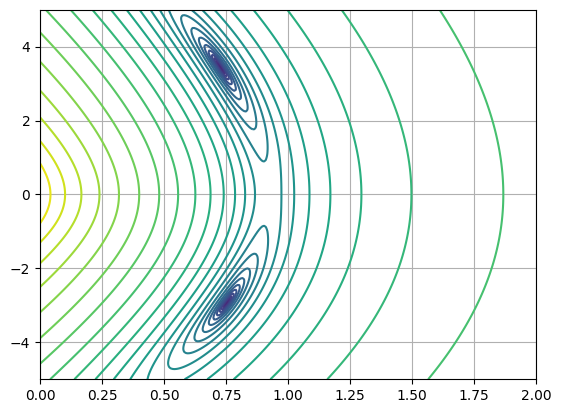

In [15]:
fig, axe = plt.subplots()
axe.contour(A, B, np.log10(SSE), 30)
axe.grid()

In [24]:
def loss_factory2(model, x, y):
    def wrapper(p):
        return 0.5 * np.sum(np.power(y - model(x, *p), 2))
    return wrapper

In [25]:
loss2 = loss_factory2(model2, xlin, ylin)

In [27]:
optimize.minimize(loss2, x0=[0., -1.])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.0897915017384716e-05
        x: [ 7.524e-01 -2.936e+00]
      nit: 16
      jac: [ 1.681e-06 -1.281e-07]
 hess_inv: [[ 7.936e-01  6.269e+00]
            [ 6.269e+00  6.197e+01]]
     nfev: 54
     njev: 18

In [28]:
optimize.minimize(loss2, x0=[0., 1.])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.5551481526809576e-05
        x: [ 7.272e-01  3.445e+00]
      nit: 17
      jac: [-1.562e-06 -1.845e-07]
 hess_inv: [[ 1.147e+00 -1.028e+01]
            [-1.028e+01  1.061e+02]]
     nfev: 57
     njev: 19